In [1]:
# Importing necessary libraries for time series analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from statsmodels.tsa.api import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import statsmodels.api as sm
import seaborn as sns

In [3]:
# Read in the data
df = pd.read_csv('/Users/helenamabey/Stats_Spring_2025/Congestion Cleaned.csv')
df.head()

,Date,Month Year,Daily Vehicle Count,Regular Gas Price Average,Midgrade Gas Price Average,Premium Gas Price Average,Monthly_Max_Temp,Monthly_Min_Temp,Monthly_Sum_Precipitation,Monthly_Snowfall
0,2005-01-01,2005-01,19470,1.7660,1.8760,1.9800,32.3,12.7,2.29,36.0
1,2005-02-01,2005-02,21207,1.8550,1.9650,2.0650,33.9,10.5,2.14,37.5
2,2005-03-01,2005-03,22943,2.0825,2.1900,2.2875,39.5,17.5,1.49,20.0
3,2005-04-01,2005-04,21288,2.2300,2.3425,2.4450,49.9,24.0,2.24,20.0
4,2005-05-01,2005-05,23505,2.1540,2.2640,2.3640,62.1,30.5,1.01,2.0


In [5]:
# Convert 'Date' to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

R² Score: -0.2148
Mean Squared Error: 17612282.17


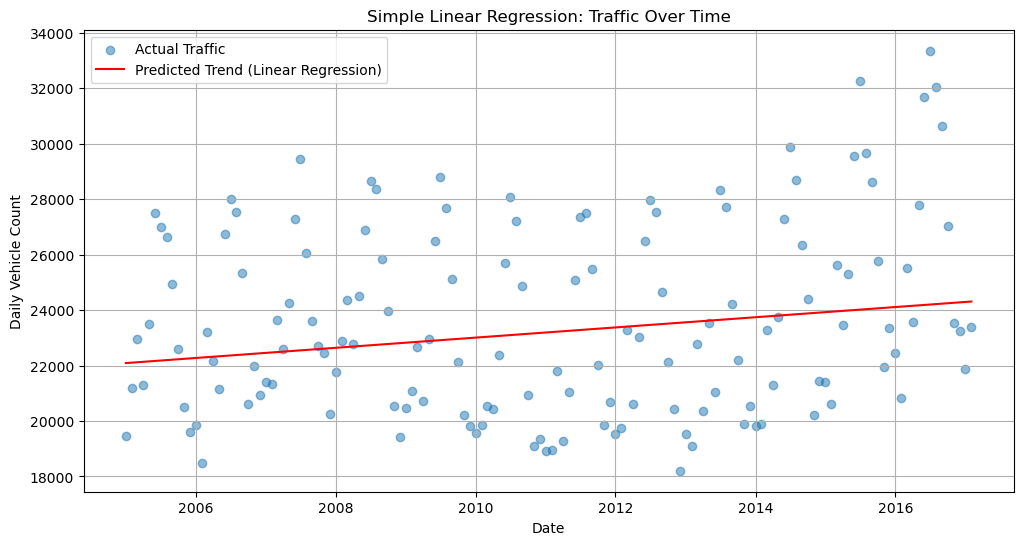

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Ensure 'Date' is in datetime format
df.index = pd.to_datetime(df.index)

# Convert Date to a numeric value (days since first date)
df['Days_Since_Start'] = (df.index - df.index.min()).days

# Define independent (X) and dependent (y) variables
X = df[['Days_Since_Start']]  # Independent variable (time)
y = df['Daily Vehicle Count']  # Dependent variable (traffic volume)

# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Fit the simple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.2f}")

# Get predictions for full dataset to visualize trend
df['Predicted_Traffic'] = model.predict(X)

# Plot actual vs. predicted traffic over time
plt.figure(figsize=(12, 6))
plt.scatter(df.index, df['Daily Vehicle Count'], label="Actual Traffic", alpha=0.5)
plt.plot(df.index, df['Predicted_Traffic'], label="Predicted Trend (Linear Regression)", color="red")
plt.xlabel("Date")
plt.ylabel("Daily Vehicle Count")
plt.title("Simple Linear Regression: Traffic Over Time")
plt.legend()
plt.grid()
plt.show()

In [9]:
import statsmodels.api as sm

# Add a constant for intercept
X_with_const = sm.add_constant(X)  

# Fit OLS regression model
model_sm = sm.OLS(y, X_with_const).fit()

# Print model summary
print(model_sm.summary())

                             OLS Regression Results                            
Dep. Variable:     Daily Vehicle Count   R-squared:                       0.039
Model:                             OLS   Adj. R-squared:                  0.032
Method:                  Least Squares   F-statistic:                     5.823
Date:                 Sun, 09 Mar 2025   Prob (F-statistic):             0.0171
Time:                         09:26:58   Log-Likelihood:                -1390.7
No. Observations:                  146   AIC:                             2785.
Df Residuals:                      144   BIC:                             2791.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2.246e+04   